In [1]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [3]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [17]:
%run ../test/test_algorithms.py

.................F....
FAIL: test_predictor_score (__main__.Testing)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\test\test_algorithms.py", line 83, in test_predictor_score
    assert_frame_equal(predictor_score(df), solution_predictor)
  File "C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\pandas\_testing.py", line 1671, in assert_frame_equal
    assert_index_equal(
  File "C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\pandas\_testing.py", line 825, in assert_index_equal
    _testing.assert_almost_equal(
  File "pandas\_libs\testing.pyx", line 46, in pandas._libs.testing.assert_almost_equal
  File "pandas\_libs\testing.pyx", line 161, in pandas._libs.testing.assert_almost_equal
  File "C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\pandas\_testing.py", line 1073, in raise_assert_detail
    raise AssertionError(msg)
AssertionError: DataFrame.columns are

SystemExit: True

In [14]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.032s

OK


In [15]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


In [16]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [17]:
%run ../test/test_activate.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [15]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [4]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [5]:
training = training.get_close()

In [6]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [7]:
predict = predict.get_close()

In [8]:
predict_req, real = data_prep(predict, 24, 30)

Epoch 1/10
23/23 [==============================] - 1s 25ms/step - loss: 32.6291 - mean_squared_error: 32.6291 - val_loss: 48.9896 - val_mean_squared_error: 48.9896
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 20.7118 - mean_squared_error: 20.7118 - val_loss: 23.8103 - val_mean_squared_error: 23.8103
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 8.8904 - mean_squared_error: 8.8904 - val_loss: 8.0619 - val_mean_squared_error: 8.0619
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 2.1727 - mean_squared_error: 2.1727 - val_loss: 1.2234 - val_mean_squared_error: 1.2234
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.2592 - mean_squared_error: 0.2592 - val_loss: 0.4467 - val_mean_squared_error: 0.4467
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.1255 - mean_squared_error: 0.1255 - val_loss: 0.4049 - val_mean_squared_error: 0.4049
Epoch 7/10
23/23 [=============

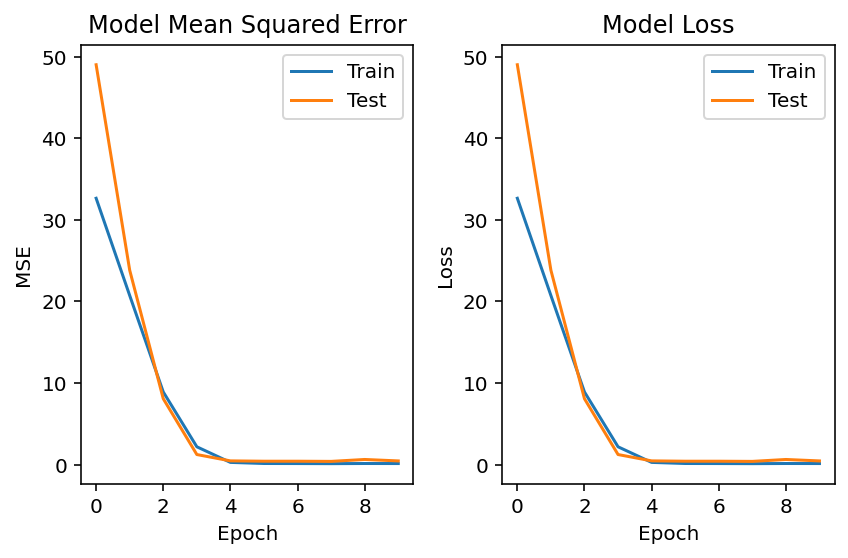

Epoch 1/10
23/23 [==============================] - 1s 40ms/step - loss: 28.5348 - mean_squared_error: 28.5348 - val_loss: 33.7050 - val_mean_squared_error: 33.7050
Epoch 2/10
23/23 [==============================] - 0s 18ms/step - loss: 11.5241 - mean_squared_error: 11.5241 - val_loss: 7.7867 - val_mean_squared_error: 7.7867
Epoch 3/10
23/23 [==============================] - 0s 18ms/step - loss: 1.5864 - mean_squared_error: 1.5864 - val_loss: 0.9906 - val_mean_squared_error: 0.9906
Epoch 4/10
23/23 [==============================] - 0s 16ms/step - loss: 0.2618 - mean_squared_error: 0.2618 - val_loss: 0.7251 - val_mean_squared_error: 0.7251
Epoch 5/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.6887 - val_mean_squared_error: 0.6887
Epoch 6/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1385 - mean_squared_error: 0.1385 - val_loss: 0.5492 - val_mean_squared_error: 0.5492
Epoch 7/10
23/23 [==========

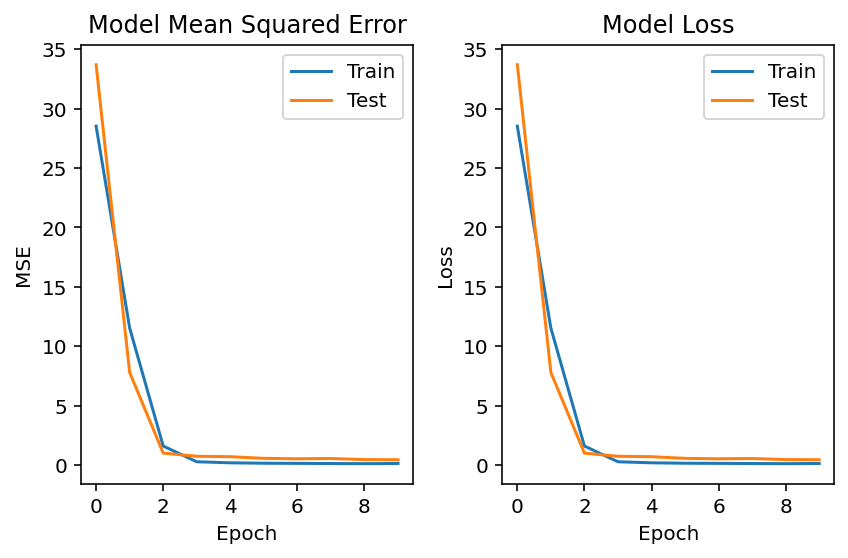

Epoch 1/10
23/23 [==============================] - 0s 7ms/step - loss: 25.8713 - mean_squared_error: 25.8713 - val_loss: 27.2094 - val_mean_squared_error: 27.2094
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 9.5376 - mean_squared_error: 9.5376 - val_loss: 7.8830 - val_mean_squared_error: 7.8830
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 2.2539 - mean_squared_error: 2.2539 - val_loss: 1.2639 - val_mean_squared_error: 1.2639
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3038 - mean_squared_error: 0.3038 - val_loss: 0.4053 - val_mean_squared_error: 0.4053
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.3669 - val_mean_squared_error: 0.3669
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.3509 - val_mean_squared_error: 0.3509
Epoch 7/10
23/23 [==================

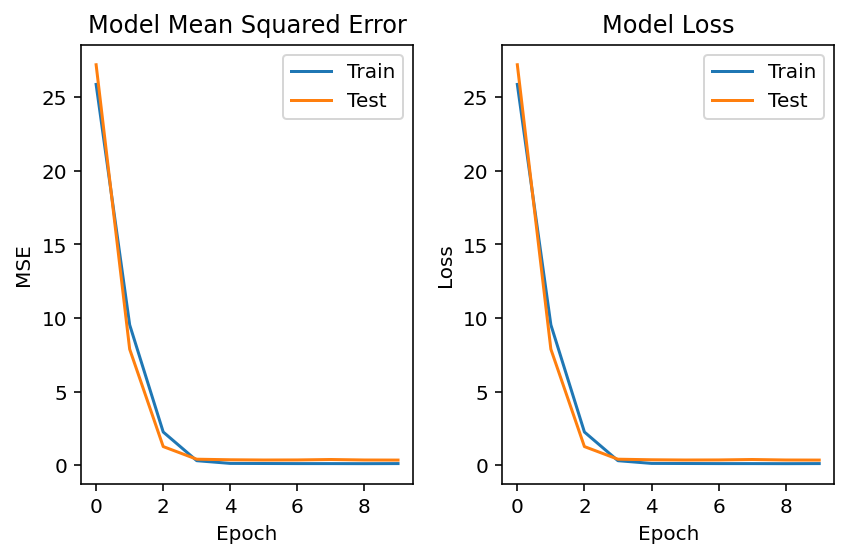

In [9]:
final_df = individual_predictors1(training, predict_req, 30)

Epoch 1/10
23/23 [==============================] - 0s 20ms/step - loss: 30.4285 - mean_squared_error: 30.4285 - val_loss: 33.5928 - val_mean_squared_error: 33.5928
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 12.6638 - mean_squared_error: 12.6638 - val_loss: 13.9400 - val_mean_squared_error: 13.9400
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 4.8618 - mean_squared_error: 4.8618 - val_loss: 4.8604 - val_mean_squared_error: 4.8604
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 1.7937 - mean_squared_error: 1.7937 - val_loss: 1.9452 - val_mean_squared_error: 1.9452
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6750 - mean_squared_error: 0.6750 - val_loss: 0.8812 - val_mean_squared_error: 0.8812
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.2631 - mean_squared_error: 0.2631 - val_loss: 0.4983 - val_mean_squared_error: 0.4983
Epoch 7/10
23/23 [=============

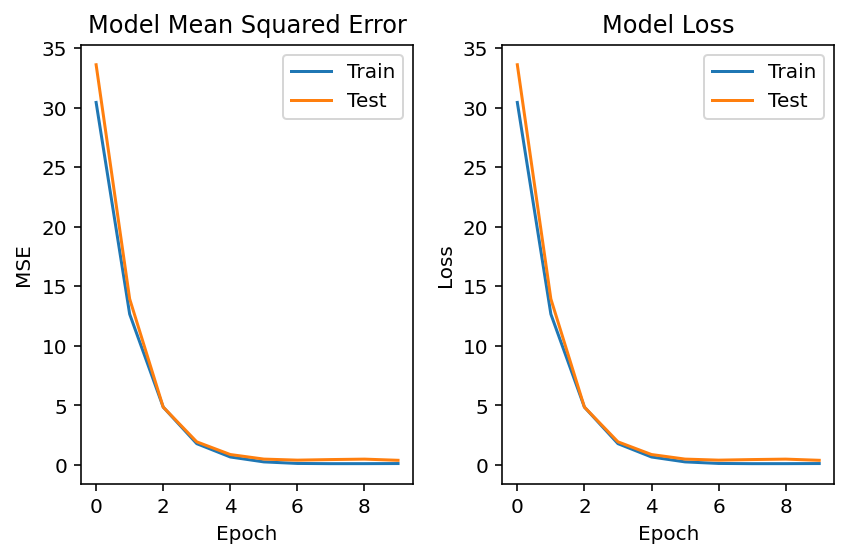

Epoch 1/10
23/23 [==============================] - 1s 38ms/step - loss: 23.6316 - mean_squared_error: 23.6316 - val_loss: 20.9406 - val_mean_squared_error: 20.9406
Epoch 2/10
23/23 [==============================] - 0s 19ms/step - loss: 5.5727 - mean_squared_error: 5.5727 - val_loss: 3.5683 - val_mean_squared_error: 3.5683
Epoch 3/10
23/23 [==============================] - 0s 20ms/step - loss: 0.8063 - mean_squared_error: 0.8063 - val_loss: 0.7433 - val_mean_squared_error: 0.7433
Epoch 4/10
23/23 [==============================] - 0s 17ms/step - loss: 0.1922 - mean_squared_error: 0.1922 - val_loss: 0.4277 - val_mean_squared_error: 0.4277
Epoch 5/10
23/23 [==============================] - 0s 18ms/step - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 0.5818 - val_mean_squared_error: 0.5818
Epoch 6/10
23/23 [==============================] - 0s 18ms/step - loss: 0.1353 - mean_squared_error: 0.1353 - val_loss: 0.4486 - val_mean_squared_error: 0.4486
Epoch 7/10
23/23 [============

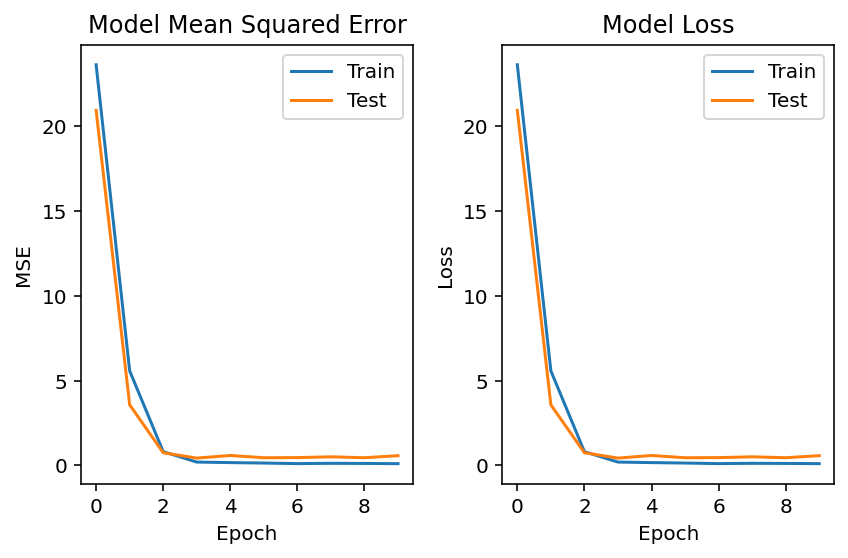

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 22.6743 - mean_squared_error: 22.6743 - val_loss: 21.9943 - val_mean_squared_error: 21.9943
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 7.8600 - mean_squared_error: 7.8600 - val_loss: 7.1075 - val_mean_squared_error: 7.1075
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 2.1487 - mean_squared_error: 2.1487 - val_loss: 1.4560 - val_mean_squared_error: 1.4560
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3491 - mean_squared_error: 0.3491 - val_loss: 0.4198 - val_mean_squared_error: 0.4198
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1280 - mean_squared_error: 0.1280 - val_loss: 0.3569 - val_mean_squared_error: 0.3569
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.3913 - val_mean_squared_error: 0.3913
Epoch 7/10
23/23 [==================

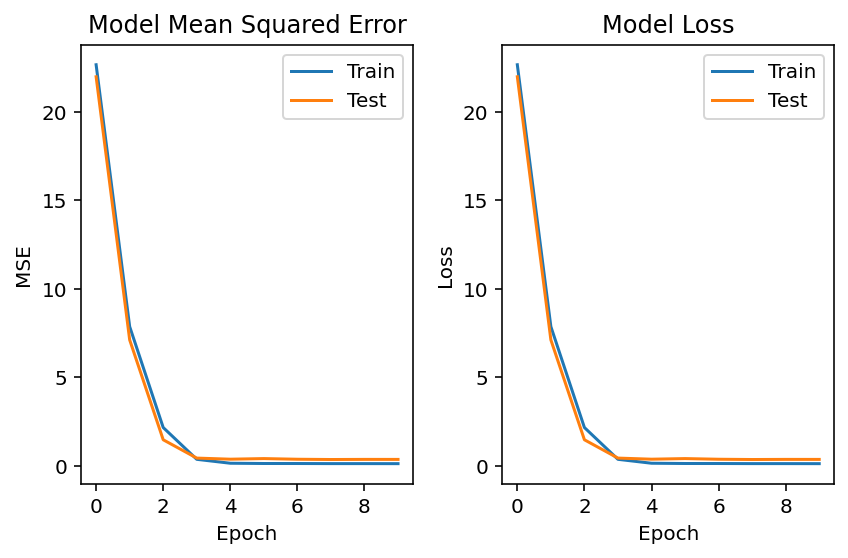

Epoch 1/10
23/23 [==============================] - 0s 6ms/step - loss: 27.7627 - mean_squared_error: 27.7627 - val_loss: 36.6599 - val_mean_squared_error: 36.6599
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 15.1879 - mean_squared_error: 15.1879 - val_loss: 16.2903 - val_mean_squared_error: 16.2903
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 5.8431 - mean_squared_error: 5.8431 - val_loss: 5.0601 - val_mean_squared_error: 5.0601
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 1.4907 - mean_squared_error: 1.4907 - val_loss: 0.9870 - val_mean_squared_error: 0.9870
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2504 - mean_squared_error: 0.2504 - val_loss: 0.4152 - val_mean_squared_error: 0.4152
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1298 - mean_squared_error: 0.1298 - val_loss: 0.3532 - val_mean_squared_error: 0.3532
Epoch 7/10
23/23 [==============

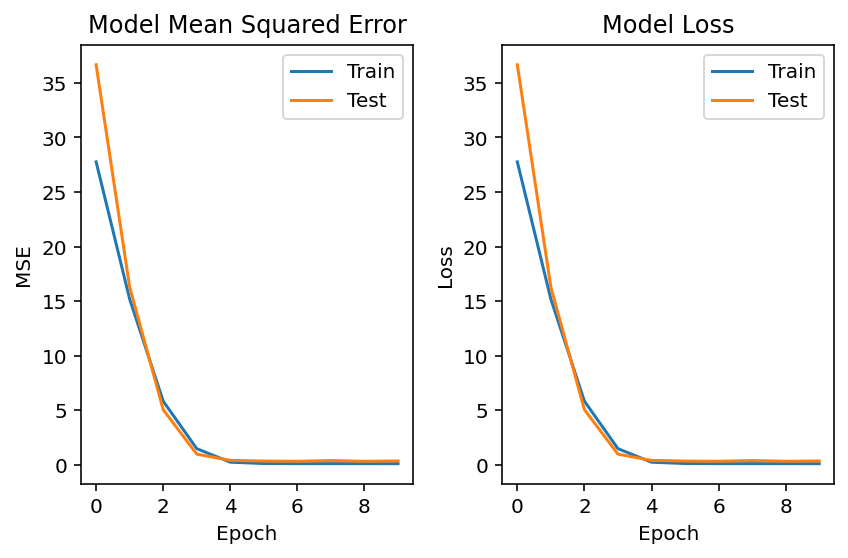

In [10]:
final_df2 = individual_predictors2(training, predict_req, 30)

In [10]:
#final_df = pd.concat([A, B, C], axis=1)

### System Disagreement

In [11]:
final_df2

,CNN-LSTM,Bidirectional LSTM,CNN,MLP
0,8.783740,7.357750,9.595095,9.562955
1,9.131042,7.567799,9.434881,9.689647
2,9.098622,9.041402,9.511773,9.697817
3,9.313035,6.674014,9.523532,9.595692
4,8.777032,7.998793,9.527373,9.749716
5,8.780221,9.020362,9.623384,9.441660
6,8.561118,8.398664,9.550371,9.730217
7,9.067865,7.529577,9.588068,9.862046
8,9.012019,8.347131,9.625054,9.881166
9,9.234329,8.847758,9.673126,9.793643


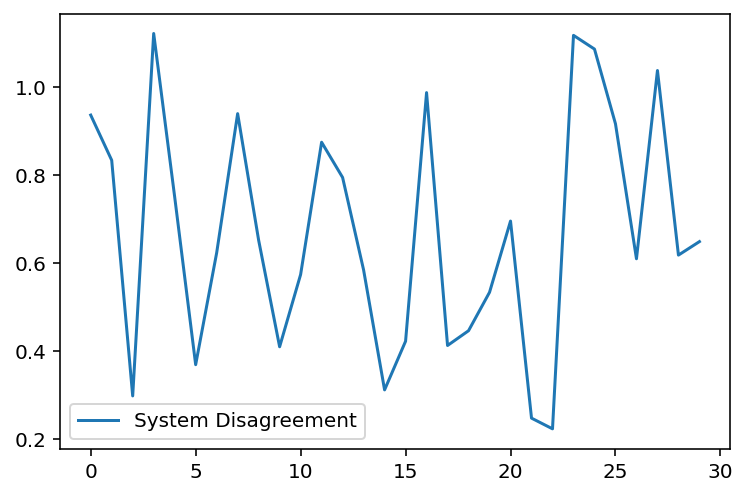

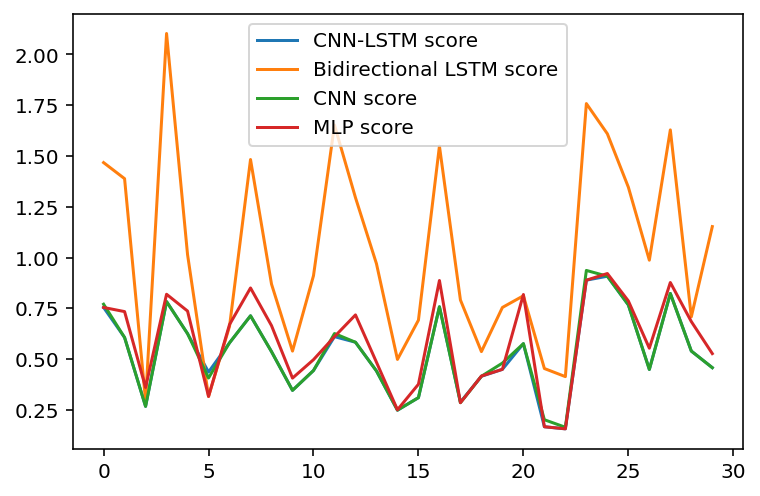

In [12]:
system_disagreement(final_df2)

In [13]:
disagreement(final_df2)

,System Disagreement
0,0.936406
1,0.833673
2,0.297799
3,1.121941
4,0.750389
5,0.368849
6,0.622989
7,0.939701
8,0.651893
9,0.409556


In [16]:
predictor_score(final_df2)

,CNN-LSTM score,Bidirectional LSTM score,CNN score,MLP score
0,0.754140,1.467135,0.770210,0.754140
1,0.606422,1.388043,0.606422,0.733805
2,0.267391,0.296002,0.267391,0.360413
3,0.783044,2.102554,0.783044,0.819124
4,0.625316,1.014435,0.625316,0.736487
5,0.436186,0.316115,0.406978,0.316115
6,0.580202,0.661429,0.580202,0.670125
7,0.713168,1.482312,0.713168,0.850157
8,0.536768,0.869212,0.536768,0.664824
9,0.346170,0.539456,0.346170,0.406429


### System consensus

In [35]:
algos = consensus(final_df2, real)

In [36]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,9.396553,9.396553,9.396553,9.396553,9.420434
1,9.140341,9.087928,9.114135,8.343049,9.077521
2,8.812986,9.052301,8.852587,9.084302,8.861012
3,9.327202,9.425625,9.358129,9.257394,9.407631
4,8.428867,8.633099,8.658233,9.491433,8.417658
5,8.848154,9.290787,9.016331,9.046203,9.078576
6,8.961292,9.168233,9.110663,9.133693,9.025833
7,9.287584,9.418185,9.394801,9.621214,9.303157
8,8.365220,8.395564,8.748295,9.624689,8.322525
9,9.639872,9.605646,9.610395,9.671606,9.691282


In [39]:
ui = combined_frame(final_df2, algos, real)

In [40]:
ui

,Average,NoMemory,Memory,Focus,Anchor,Real Value,CNN-LSTM,Bidirectional LSTM,CNN,MLP
Date,,,,,,,,,,
2010-07-06,9.396553,9.396553,9.396553,9.396553,9.420434,8.879643,9.598654,9.076821,9.369738,9.541000
2010-07-07,9.140341,9.087928,9.114135,8.343049,9.077521,9.238214,9.152613,8.343049,9.407073,9.658629
2010-07-08,8.812986,9.052301,8.852587,9.084302,8.861012,9.217500,9.084302,6.987395,9.487443,9.692805
2010-07-09,9.327202,9.425625,9.358129,9.257394,9.407631,9.272143,9.257394,8.814042,9.528090,9.709281
2010-07-12,8.428867,8.633099,8.658233,9.491433,8.417658,9.188929,9.491433,5.031631,9.501368,9.691038
2010-07-13,8.848154,9.290787,9.016331,9.046203,9.078576,8.992857,9.046203,6.980329,9.570560,9.795526
2010-07-14,8.961292,9.168233,9.110663,9.133693,9.025833,9.026071,9.133693,7.409716,9.553055,9.748706
2010-07-15,9.287584,9.418185,9.394801,9.621214,9.303157,8.980357,9.621214,8.266061,9.527421,9.735640
2010-07-16,8.365220,8.395564,8.748295,9.624689,8.322525,8.925000,9.624962,4.352298,9.624689,9.858932


In [41]:
mse_score(ui)

([('Average', 0.3540162807306527),
  ('NoMemory', 0.37642185816360907),
  ('Memory', 0.254169800741759),
  ('Focus', 3.259384786931361),
  ('Anchor', 0.3728502629134932)],
 [('CNN-LSTM', 0.26647490871434154),
  ('Bidirectional LSTM', 8.324915675644718),
  ('CNN', 0.5233924465461617),
  ('MLP', 0.8012783434647948)])

In [42]:
mse_log_score(ui)

([('Average', 0.003457797749739994),
  ('NoMemory', 0.0037790424588926897),
  ('Memory', 0.0023797526112338957),
  ('Focus', 0.11548025039401735),
  ('Anchor', 0.00368572751430708)],
 [('CNN-LSTM', 0.002473220102586057),
  ('Bidirectional LSTM', 0.1925798896234703),
  ('CNN', 0.004744245279662772),
  ('MLP', 0.007148131643448006)])

In [43]:
mae_score(ui)

([('Average', 0.49149054239193596),
  ('NoMemory', 0.4793342810376226),
  ('Memory', 0.4025749835734846),
  ('Focus', 0.901938396692276),
  ('Anchor', 0.48050172181309087)],
 [('CNN-LSTM', 0.44984960556030273),
  ('Bidirectional LSTM', 2.236605054140091),
  ('CNN', 0.6676587740580241),
  ('MLP', 0.8531541506449382)])

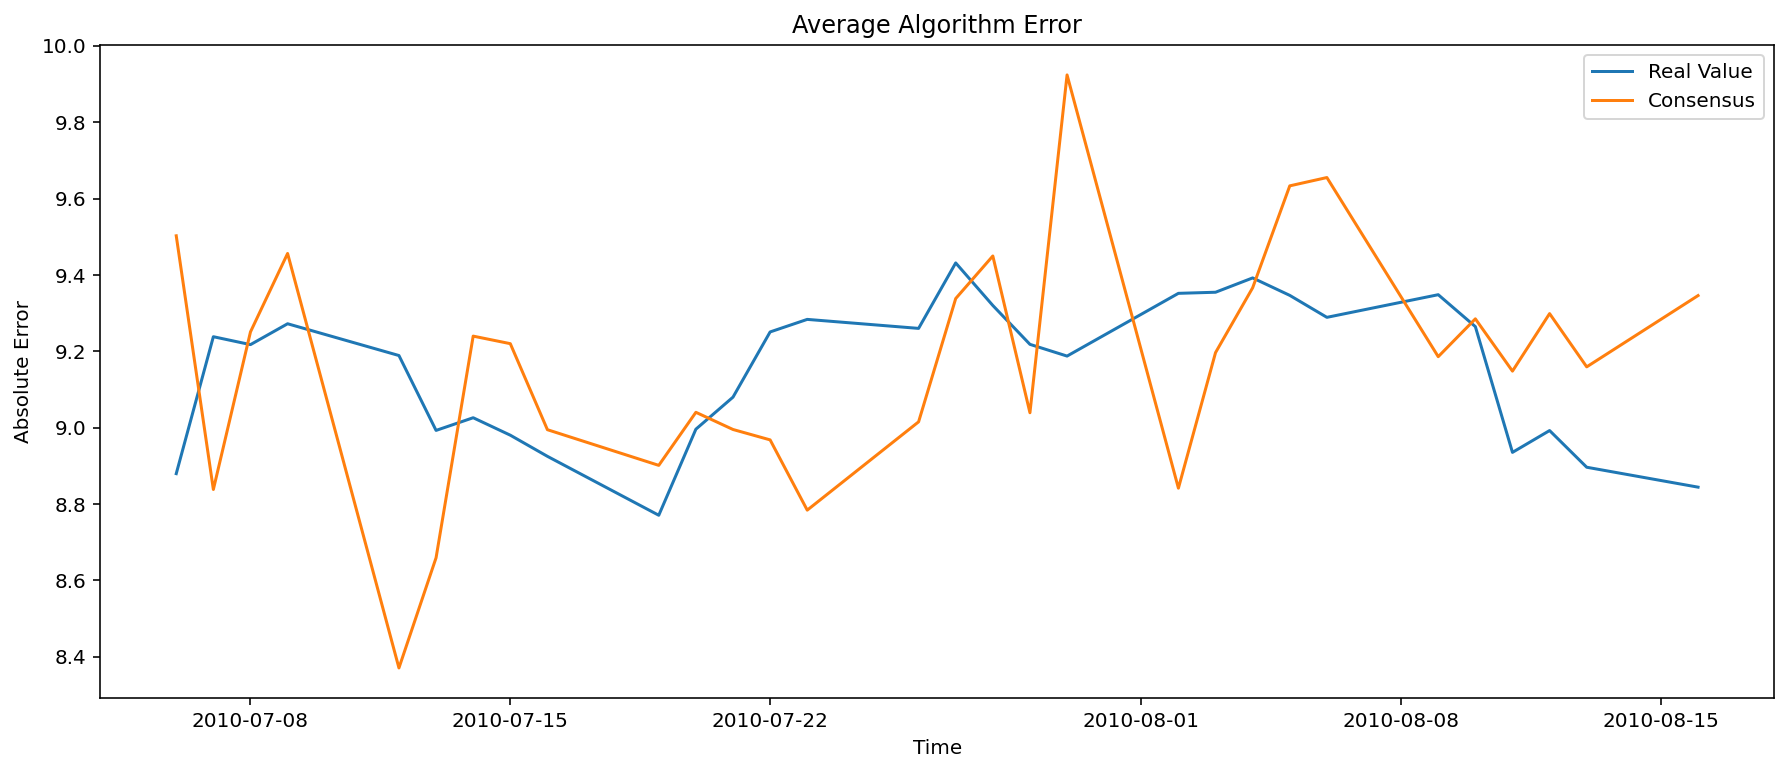

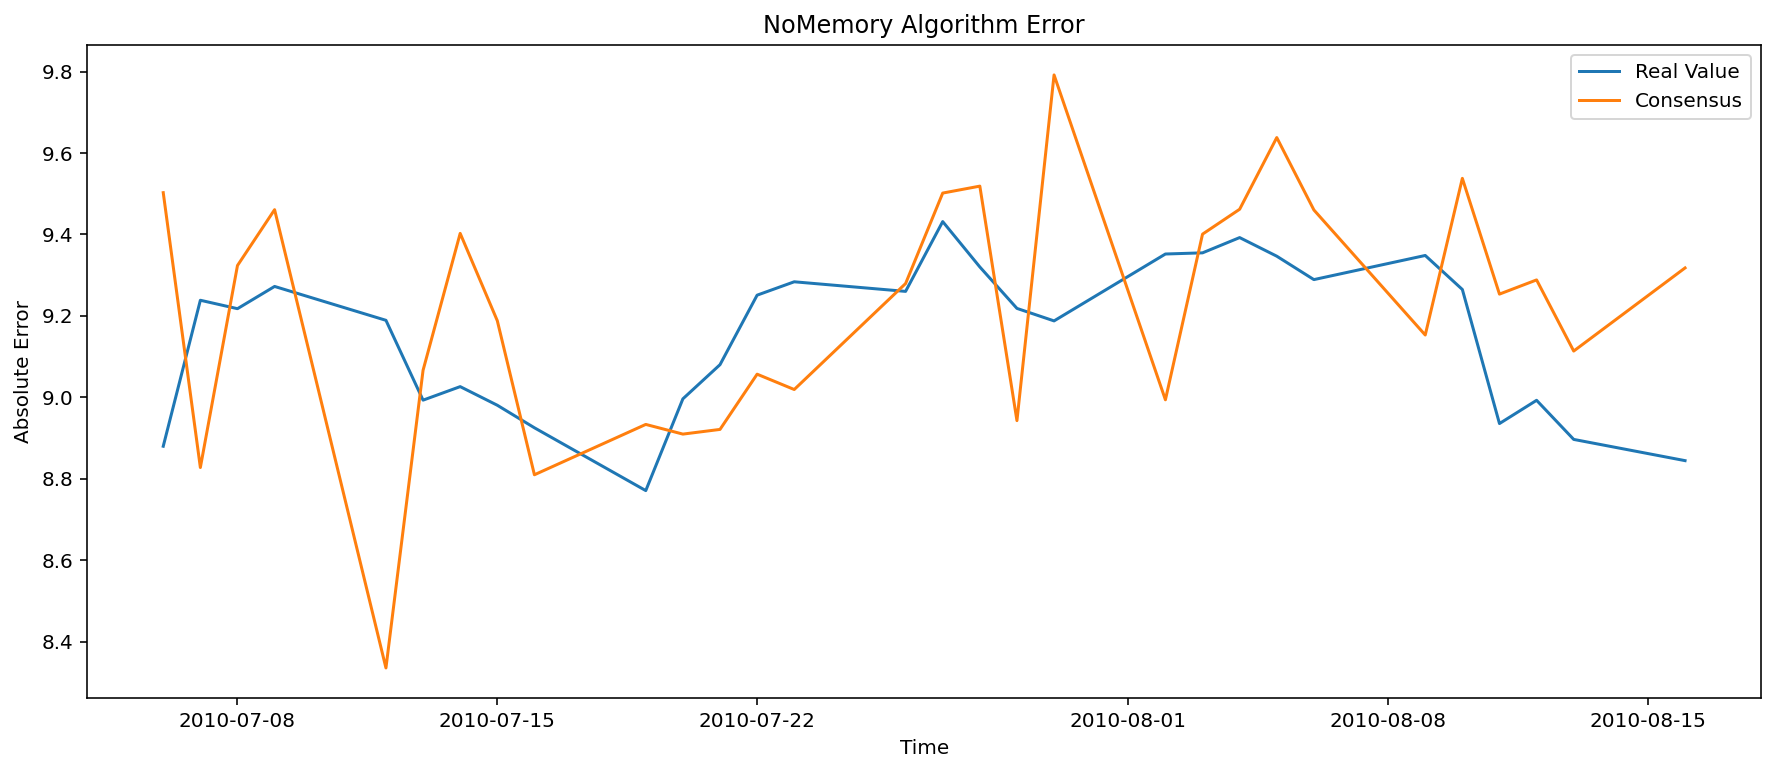

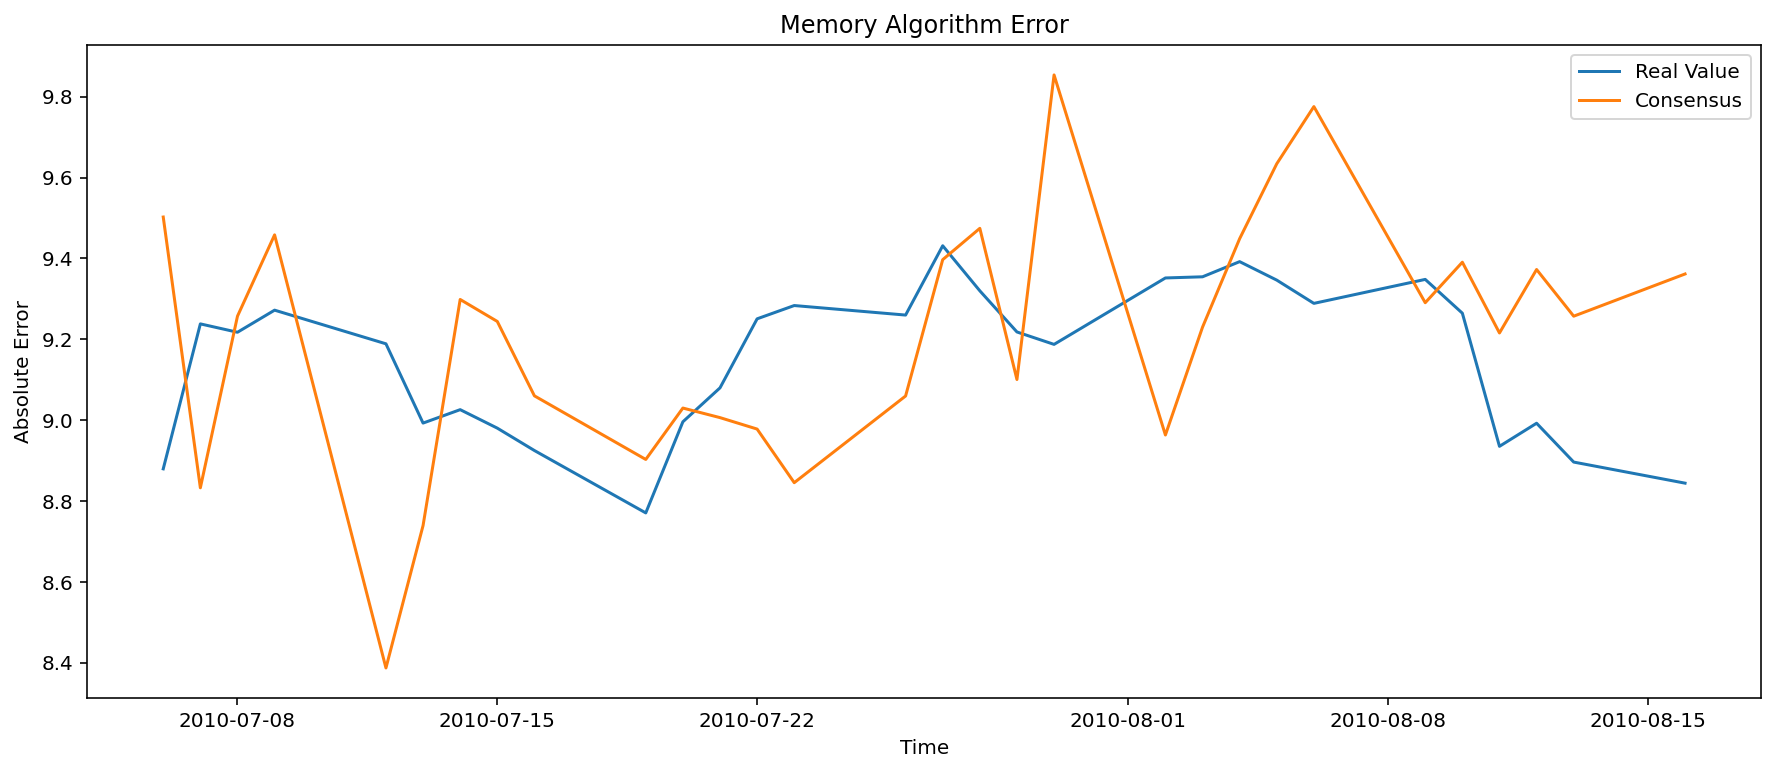

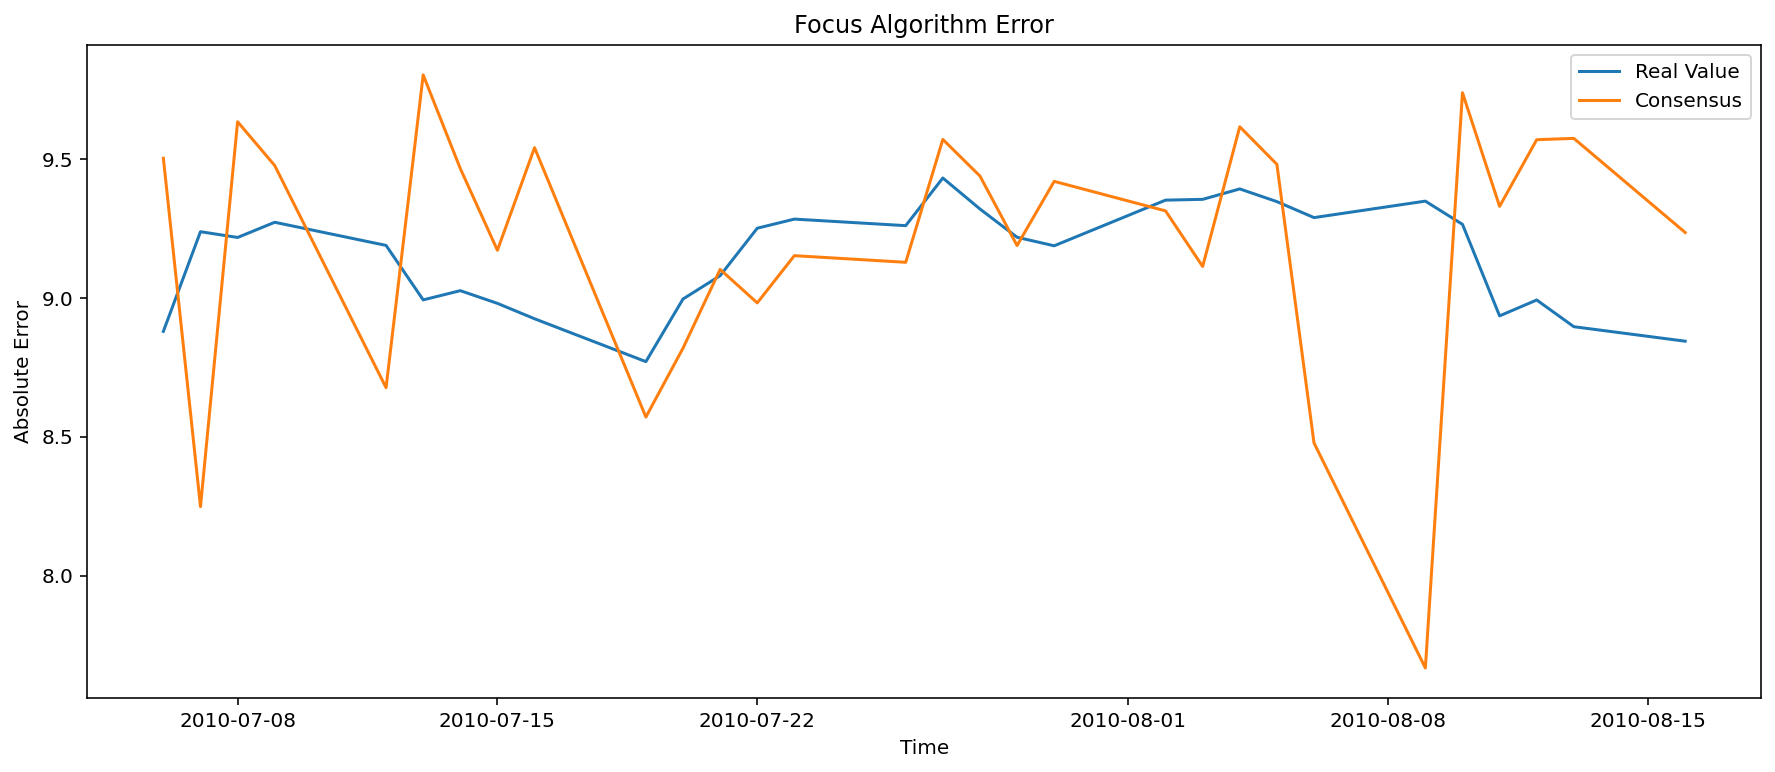

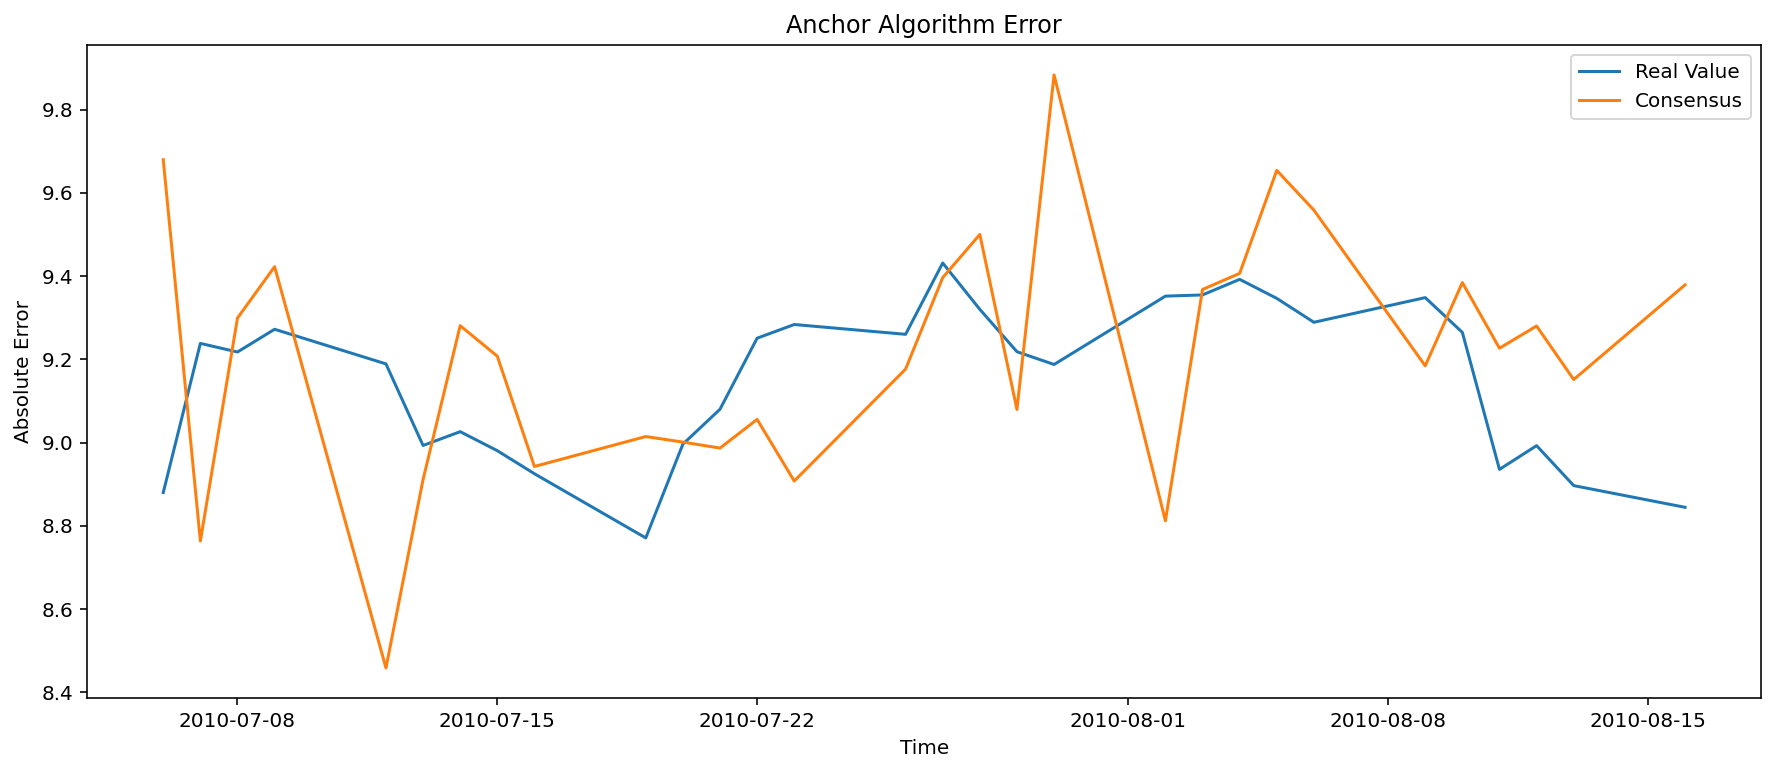

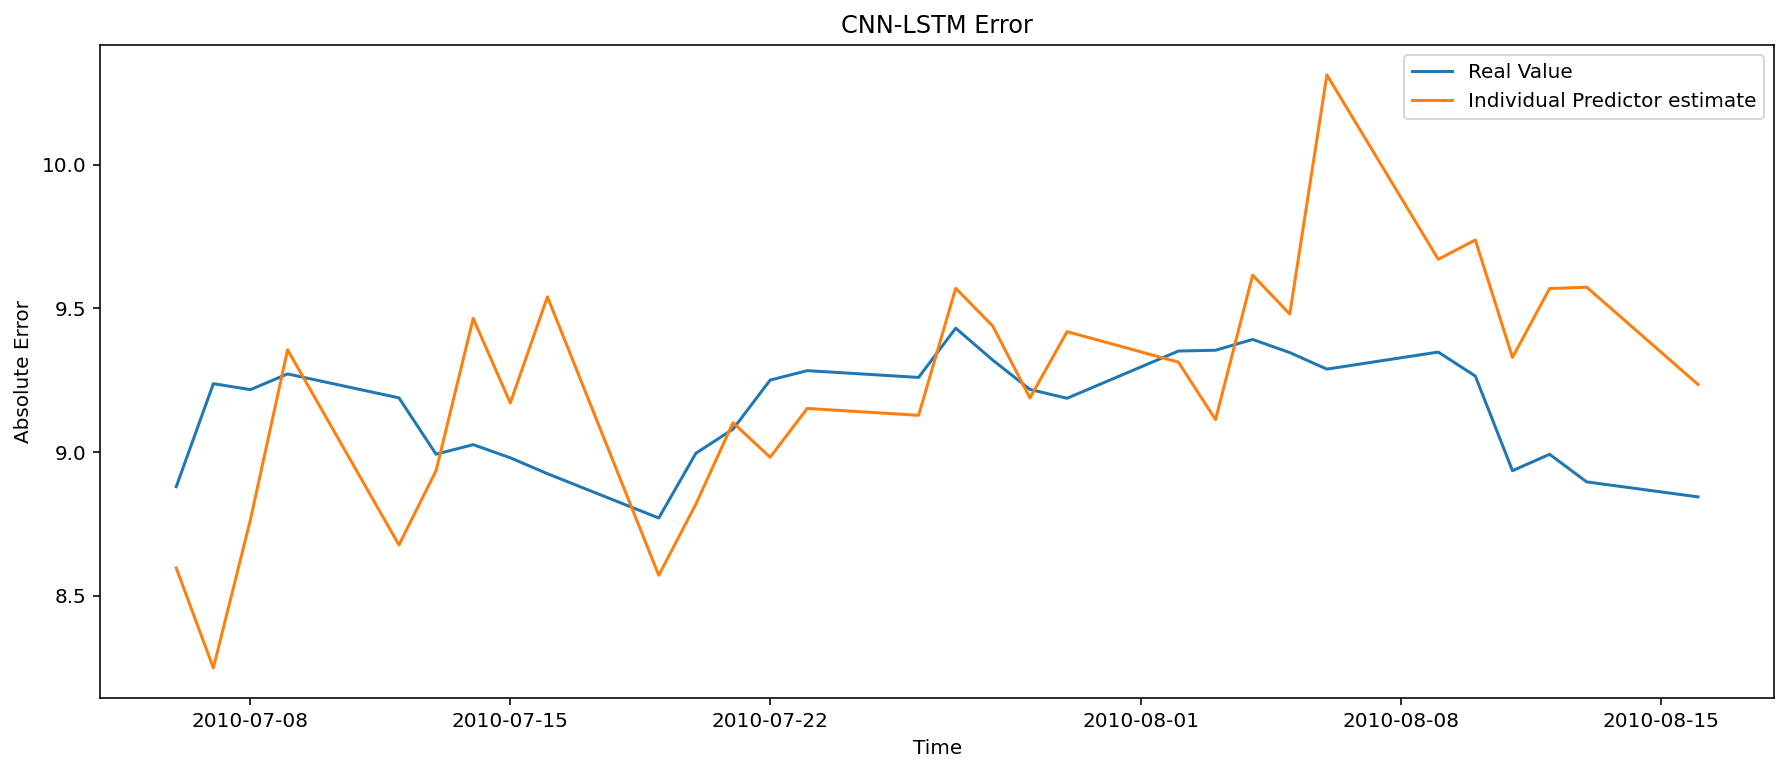

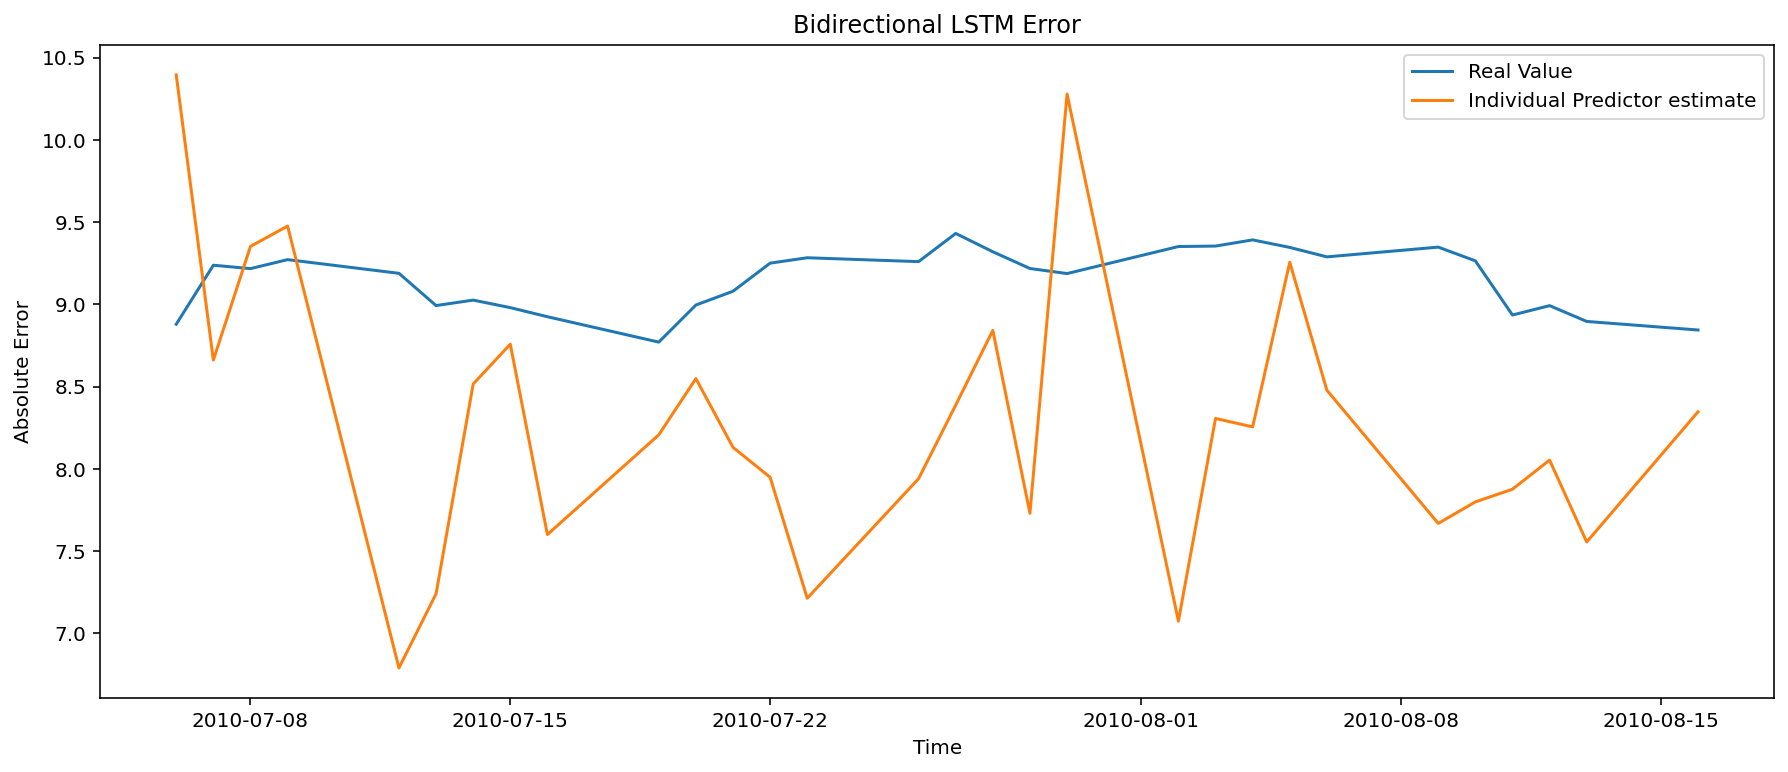

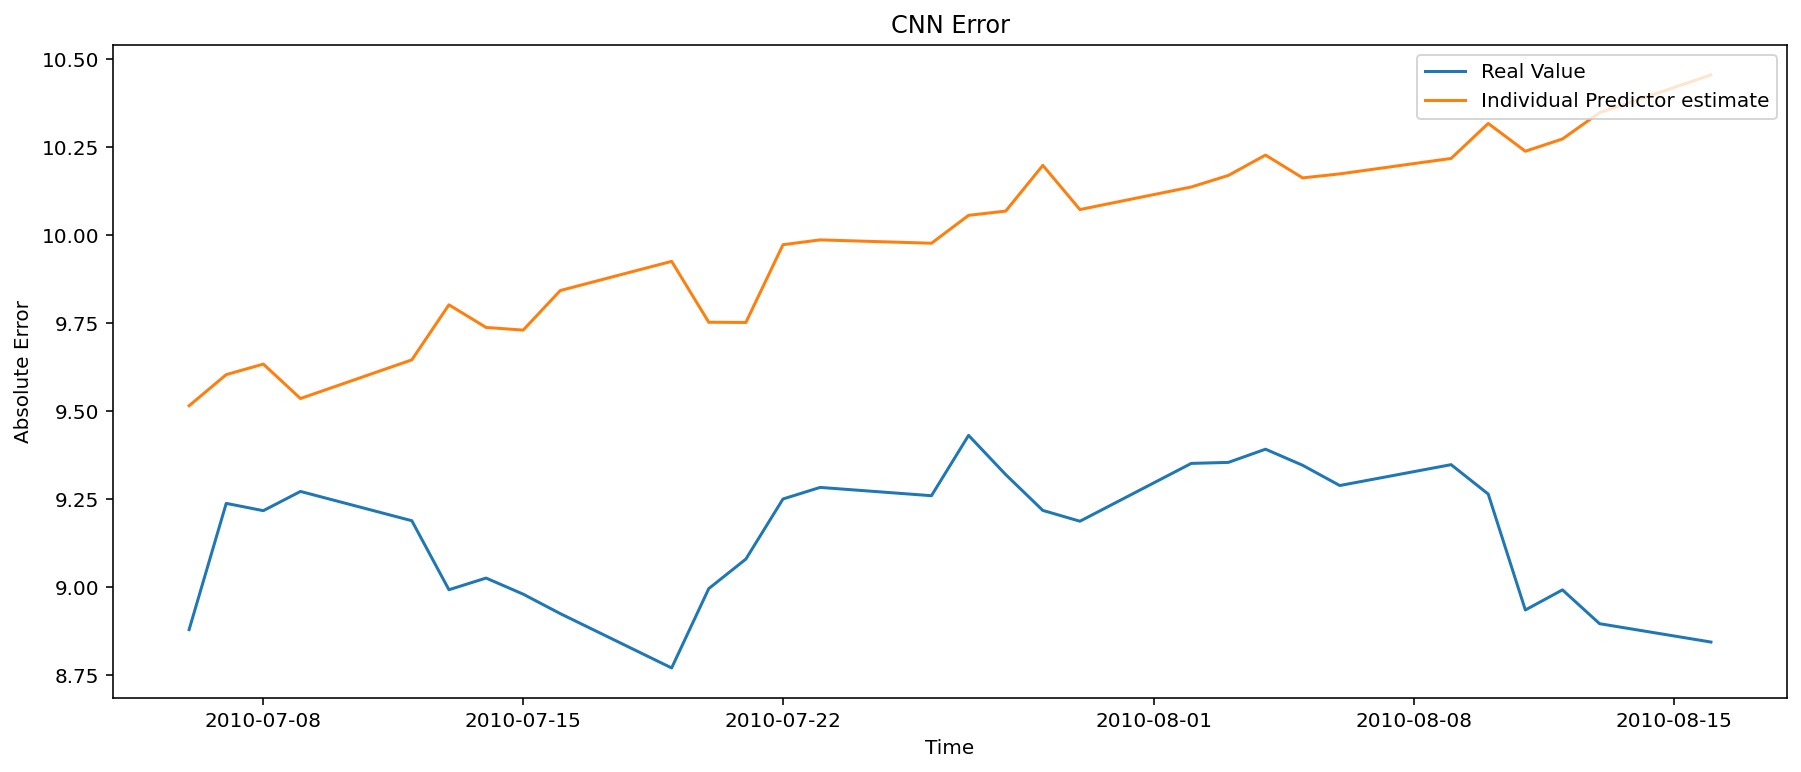

In [22]:
plot_performance(ui)

In [4]:
d = {'Date': ['2010-02-01','2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10'], 'High': [7, 7.011428833, 7.150000095, 7.084642887, 7, 7.067142963, 7.053571224, 7.021429062]}
data = pd.DataFrame(data=d)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
d = {'Date': ['2010-02-01','2010-02-02', '2010-02-03'], 'High': [7, 7.011428833, 7.150000095]}
data = pd.DataFrame(data=d)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [26]:
data

,High
Date,
2010-02-01,7.000000
2010-02-02,7.011429
2010-02-03,7.150000
2010-02-04,7.084643
2010-02-05,7.000000
2010-02-08,7.067143
2010-02-09,7.053571
2010-02-10,7.021429


In [29]:
to = data_prep(data, 3, 2)

In [33]:
to[0]

,High
Date,
2010-02-01,7.000000
2010-02-02,7.011429
2010-02-03,7.150000


In [34]:
to[1]

,High
Date,
2010-02-04,7.084643
2010-02-05,7.000000
